# Meily Adennia (2310506013)

# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


In [2]:
pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=b4d4aa768004b87ce509e0173ab3c6bad783c5afcd9acef3166418fe0f512531
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.3
    Uninstalling pyspark-3.5.3:
      Successfully uninstalled pyspark-3.5.3


In [3]:
pip install pandas

In [4]:
pip install findspark

### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Company").getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [6]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [7]:
print("Rata-rata gaji per departemen")
spark.sql('''
SELECT DeptId, AVG(Salary) as AverageSalary
FROM employees
GROUP BY DeptId
''').show()

print("Karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing")
spark.sql('''
SELECT Name, Gender, Salary
FROM employees e
WHERE Salary >= (
    SELECT AVG(Salary)
    FROM employees
    WHERE Gender = e.Gender
)
''').show()

print("Ranking karyawan berdasarkan gaji dalam departemen mereka")
spark.sql('''
SELECT DeptId, Name, Salary,
       RANK() OVER (PARTITION BY Gender ORDER BY Salary DESC) as RankSalary
FROM employees
''').show()

Rata-rata gaji per departemen
+------+-------------+
|DeptId|AverageSalary|
+------+-------------+
|     1|       2850.0|
|     2|       4100.0|
+------+-------------+

Karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing
+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
| Anna|     F|  4100|
+-----+------+------+

Ranking karyawan berdasarkan gaji dalam departemen mereka
+------+-----+------+----------+
|DeptId| Name|Salary|RankSalary|
+------+-----+------+----------+
|     2| Anna|  4100|         1|
|     1|James|  3000|         1|
|     1|  Lee|  2700|         2|
+------+-----+------+----------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [8]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



menjelaskan windows function

### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [13]:
print("Rata-rata gaji setiap departemen")
spark.sql('''
SELECT d.DeptName, AVG(e.Salary) as AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').show()

print("Ranking karyawan tiap departemen berdasarkan gaji")
spark.sql('''
SELECT d.DeptName, e.Name, e.Salary,
       RANK() OVER (PARTITION BY d.DeptName ORDER BY Salary DESC) as RankSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

Rata-rata gaji setiap departemen
+---------+-------------+
| DeptName|AverageSalary|
+---------+-------------+
|       HR|       2850.0|
|Marketing|       4100.0|
+---------+-------------+

Ranking karyawan tiap departemen berdasarkan gaji
+---------+-----+------+----------+
| DeptName| Name|Salary|RankSalary|
+---------+-----+------+----------+
|       HR|James|  3000|         1|
|       HR|  Lee|  2700|         2|
|Marketing| Anna|  4100|         1|
+---------+-----+------+----------+



In [14]:
spark.sql('''
SELECT d.DeptName, e.Age, AVG(e.Salary) OVER (PARTITION BY d.DeptName, e.Age) as AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+---------+---+-------------+
| DeptName|Age|AverageSalary|
+---------+---+-------------+
|       HR| 23|       2700.0|
|       HR| 34|       3000.0|
|Marketing| 28|       4100.0|
+---------+---+-------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


In [15]:
spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').show()

+---+-------------+
|Age|AverageSalary|
+---+-------------+
| 23|       2700.0|
| 28|       4100.0|
| 34|       3000.0|
+---+-------------+



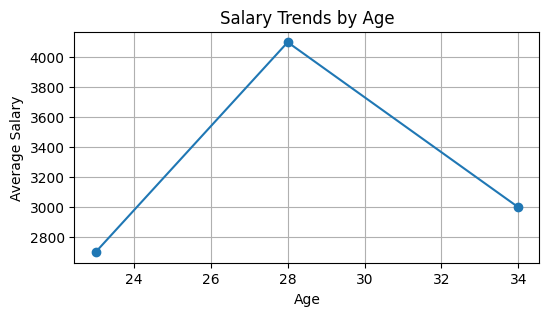

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(6, 3))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.


In [16]:
spark.sql('''
SELECT d.DeptName, SUM(e.Salary) as TotalSalary, COUNT(e.Name) as NumberEmployees
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptId, d.DeptName
''').show()

+---------+-----------+---------------+
| DeptName|TotalSalary|NumberEmployees|
+---------+-----------+---------------+
|       HR|       5700|              2|
|Marketing|       4100|              1|
+---------+-----------+---------------+



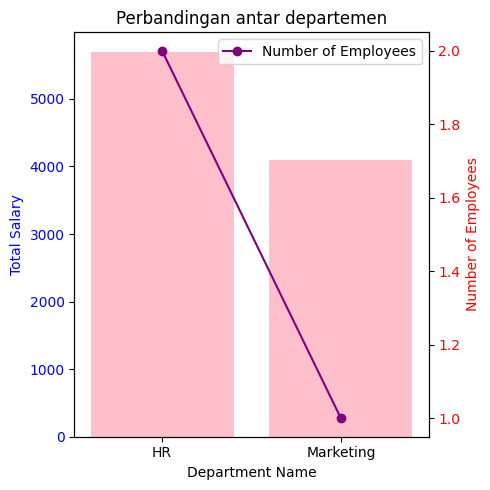

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Query SQL untuk mendapatkan perbandingan total gaji dan jumlah karyawan tiap departemen
perbandingan = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) as TotalSalary, COUNT(e.Name) as NumberEmployees
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptId, d.DeptName
''').toPandas()

# Membuat visualisasi
fig, ax1 = plt.subplots(figsize=(5, 5))

# Diagram batang untuk Total Salary
ax1.bar(perbandingan['DeptName'], perbandingan['TotalSalary'], color='pink', label='Total Salary')
ax1.set_xlabel('Department Name')
ax1.set_ylabel('Total Salary', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Diagram garis untuk Number of Employees
ax2 = ax1.twinx()
ax2.plot(perbandingan['DeptName'], perbandingan['NumberEmployees'], color='purple', marker='o', label='Number of Employees')
ax2.set_ylabel('Number of Employees', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Menambahkan judul
plt.title('Perbandingan antar departemen')
fig.tight_layout()
plt.legend(loc='upper right')

# Menampilkan diagram
plt.show()

- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.

In [18]:
print("Rata-rata gaji karyawan")
spark.sql('SELECT AVG(Salary) as AverageSalary FROM employees').show()

print("Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia")
spark.sql('''
SELECT Name, Age, Salary
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').show()

Rata-rata gaji karyawan
+------------------+
|     AverageSalary|
+------------------+
|3266.6666666666665|
+------------------+

Karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia
+----+---+------+
|Name|Age|Salary|
+----+---+------+
|Anna| 28|  4100|
+----+---+------+



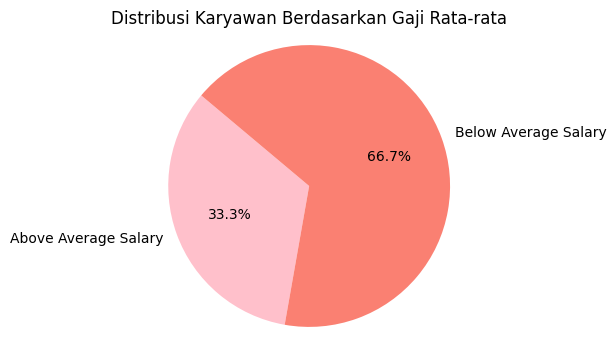

In [19]:
# Query SQL untuk mendapatkan jumlah karyawan di atas rata-rata
above_average = spark.sql('''
SELECT COUNT(*) AS Count
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').collect()[0]['Count']

# Query SQL untuk mendapatkan jumlah karyawan di bawah rata-rata
below_average = spark.sql('''
SELECT COUNT(*) AS Count
FROM employees
WHERE Salary < (SELECT AVG(Salary) FROM employees)
''').collect()[0]['Count']

# Menyiapkan data untuk pie chart
labels = ['Above Average Salary', 'Below Average Salary']
sizes = [above_average, below_average]
colors = ['pink', 'salmon']
explode = (0, 0)

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Karyawan Berdasarkan Gaji Rata-rata')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.

**SQL Functions AVG()**

In [20]:
# Membuat Spark Session
spark = SparkSession.builder.appName("Salary Analysis").getOrCreate()

# Load dataset salaries.csv menggunakan Spark
file_salaries = "salaries.csv"
df_spark = spark.read.option("header", True).csv(file_salaries, inferSchema=True)

# Analisis menggunakan SQL Functions AVG()
df_spark.createOrReplaceTempView("salaries")
spark.sql('''
SELECT job_title, experience_level, AVG(salary) AS AverageSalary
FROM salaries
GROUP BY job_title, experience_level
ORDER BY experience_level
''').show()

+--------------------+----------------+------------------+
|           job_title|experience_level|     AverageSalary|
+--------------------+----------------+------------------+
|        Data Analyst|              EN|           85550.0|
|     BI Data Analyst|              EN|           25000.0|
|Data Integration ...|              EN|          170000.0|
|Business Intellig...|              EN|          500000.0|
|      Data Scientist|              EN|           95700.0|
|  Analytics Engineer|              EN|           34800.0|
|AI Research Engineer|              EN|           30000.0|
|        Data Analyst|              EX|          106250.0|
|Data Science Dire...|              EX|          201000.0|
|       Data Engineer|              EX|          117500.0|
|  Analytics Engineer|              MI|           87500.0|
|     Data Specialist|              MI|           85000.0|
|   Applied Scientist|              MI|          199300.0|
|       Data Engineer|              MI|130442.8571428571

**SQL Functions SUM()**

In [21]:
# Analisis menggunakan SQL Functions SUM()
spark.sql('''
SELECT job_title, SUM(Salary) as TotalSalary
FROM salaries
GROUP BY job_title
''').show()

+--------------------+-----------+
|           job_title|TotalSalary|
+--------------------+-----------+
|Business Intellig...|     323000|
|     Data Specialist|     170000|
|Data Science Prac...|     254100|
|Data Integration ...|     340000|
|Machine Learning ...|     274500|
|Business Intellig...|     270000|
|        BI Developer|     274000|
|Data Science Dire...|     402000|
|Business Intellig...|     500000|
|Machine Learning ...|    6326400|
|Business Intellig...|    1586100|
|AI Research Engineer|      30000|
|  Research Scientist|    2082900|
|Business Intellig...|     250000|
|      Data Scientist|    9529228|
|        Data Analyst|    6463796|
|         ML Engineer|     450000|
|  Analytics Engineer|    2320250|
|   Applied Scientist|    2665200|
|Data Product Manager|     265000|
+--------------------+-----------+
only showing top 20 rows



**SQL Functions COUNT()**

In [22]:
# Load dataset salaries.csv menggunakan Spark
file_companies = "companies.csv"
df_spark = spark.read.option("header", True).csv(file_companies, inferSchema=True)

# Analisis menggunakan SQL Functions COUNT()
df_spark.createOrReplaceTempView("companies")
spark.sql('''
SELECT company_location, COUNT(*) AS TotalCompany
FROM companies
GROUP BY company_location
ORDER BY TotalCompany DESC;
''').show()

+----------------+------------+
|company_location|TotalCompany|
+----------------+------------+
|              US|         275|
|              CA|          14|
|              GB|           5|
|              LT|           2|
|              NL|           2|
|              PT|           2|
|              IN|           1|
+----------------+------------+



**SQL Functions JOIN()**

In [23]:
# Analisis menggunakan SQL Functions JOIN()
spark.sql('''
SELECT s.job_title, AVG(s.salary) as AverageSalary, c.company_location
FROM salaries s
JOIN companies c
ON s.job_title = c.job_title
WHERE s.job_title IN ('Data Scientist', 'Data Analyst', 'Data Engineet', 'Data Architect')
GROUP BY s.job_title, c.company_location
''').show()

+--------------+------------------+----------------+
|     job_title|     AverageSalary|company_location|
+--------------+------------------+----------------+
|Data Scientist| 156216.8524590164|              CA|
|Data Scientist| 156216.8524590164|              GB|
|  Data Analyst|107729.93333333333|              US|
|Data Architect|          174125.0|              US|
|Data Scientist| 156216.8524590164|              US|
|Data Architect|          174125.0|              CA|
|  Data Analyst|107729.93333333333|              CA|
+--------------+------------------+----------------+



Tabel Distribusi Rata-rata Gaji berdasarkan Pekerjaan dan Lokasi Perusahaan
+--------------+------------------+----------------+
|     job_title|     AverageSalary|company_location|
+--------------+------------------+----------------+
|Data Scientist| 156216.8524590164|              CA|
| Data Engineer|          150745.5|              US|
|Data Scientist| 156216.8524590164|              GB|
|  Data Analyst|107729.93333333333|              US|
|Data Architect|          174125.0|              US|
| Data Engineer|          150745.5|              CA|
|Data Scientist| 156216.8524590164|              US|
|Data Architect|          174125.0|              CA|
|  Data Analyst|107729.93333333333|              CA|
+--------------+------------------+----------------+



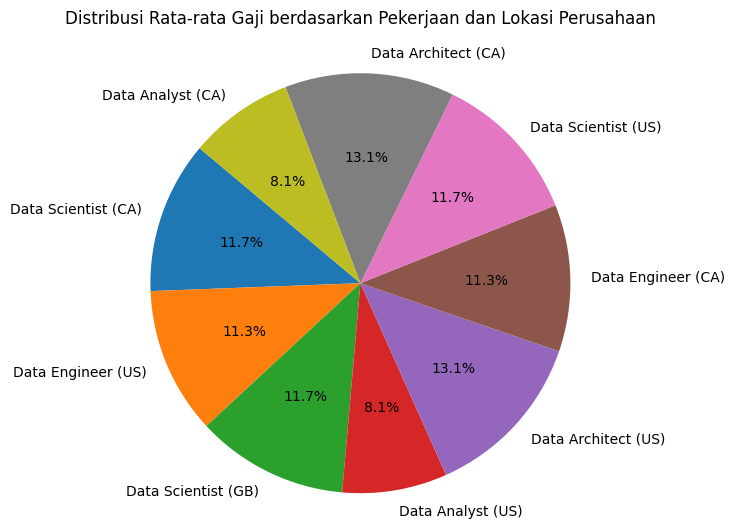

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Query SQL untuk mendapatkan data
result = spark.sql('''
SELECT s.job_title, AVG(s.salary) as AverageSalary, c.company_location
FROM salaries s
JOIN companies c
ON s.job_title = c.job_title
WHERE s.job_title IN ('Data Scientist', 'Data Analyst', 'Data Engineer', 'Data Architect')
GROUP BY s.job_title, c.company_location
''')

result_pd = result.toPandas() # Konversi DataFrame ke Pandas

# Memastikan bahwa data telah diperoleh
print("Tabel Distribusi Rata-rata Gaji berdasarkan Pekerjaan dan Lokasi Perusahaan")
result.show()

# Membuat pie chart untuk rata-rata gaji berdasarkan job title
# Menggabungkan job_title dan company_location untuk label
result_pd['label'] = result_pd['job_title'] + " (" + result_pd['company_location'] + ")"

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(result_pd['AverageSalary'], labels=result_pd['label'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Rata-rata Gaji berdasarkan Pekerjaan dan Lokasi Perusahaan\n')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran

plt.show()
